In [7]:
import tensorflow as tf
tf.keras.utils.get_file(
    "ridership.tgz",
    "https://github.com/ageron/data/raw/main/ridership.tgz",
    cache_dir=".",
    extract=True
)

108512/108512 [==============================] - 0s 1us/step


'.\\datasets\\ridership.tgz'

In [ ]:
import pandas as pd
from pathlib import Path

In [9]:
path = Path("datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]  # shorter names
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)  # no need for total, it's just bus + rail
df = df.drop_duplicates()  # remove duplicated months (2011-10 and 2014-07)

In [12]:
df.head()
# day_type: A for Weekdays, A for Saturdays, U for Sundays

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917


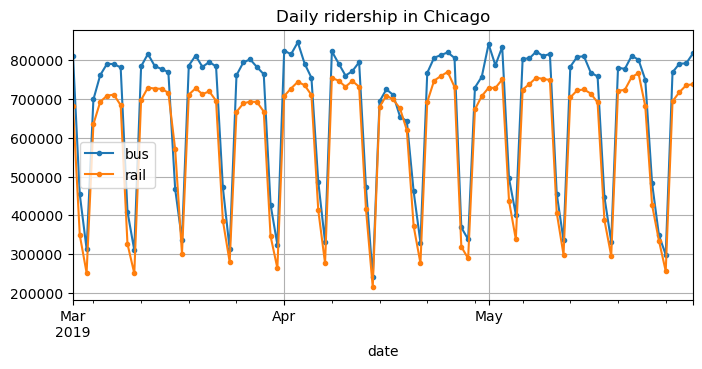

In [14]:
import matplotlib.pyplot as plt

df["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(8,3.5))
plt.title("Daily ridership in Chicago")
plt.show()

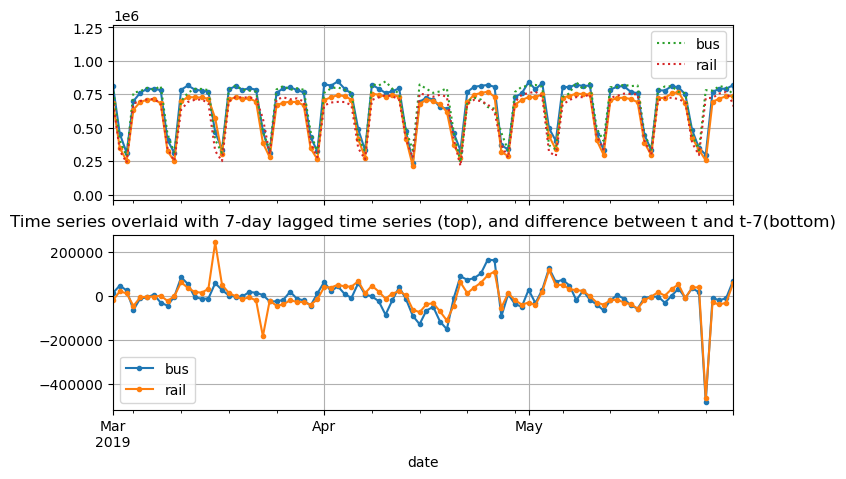

In [21]:
# Native forcating

diff_7 = df[['bus', 'rail']].diff(7)["2019-03":"2019-05"]

fig,axs = plt.subplots(2,1, sharex=True, figsize=(8,5))
df.plot(ax=axs[0], legend=False, marker=".")
df.shift(7).plot(ax=axs[0], grid=True, legend=True, linestyle=":")
diff_7.plot(ax=axs[1], grid=True, marker='.')

plt.title("Time series overlaid with 7-day lagged time series (top), and difference between t and t-7(bottom)")
plt.show()

#### The lagged time series closely track actual time series, called autocorrelated. But fairly a small difference in the end of the May, maybe there is a holiday, let's check.

In [25]:
list(df.loc["2019-05-25":"2019-05-27"]["day_type"])

['A', 'U', 'U']

In [26]:
diff_7.abs().mean()

bus     43915.608696
rail    42143.271739
dtype: float64

In [28]:
# MAPE
targets = df[['bus','rail']]["2019-03":"2019-05"]
(diff_7/targets).abs().mean()

bus     0.082938
rail    0.089948
dtype: float64

#### 12-month Rolling Average: 2001 to 2019

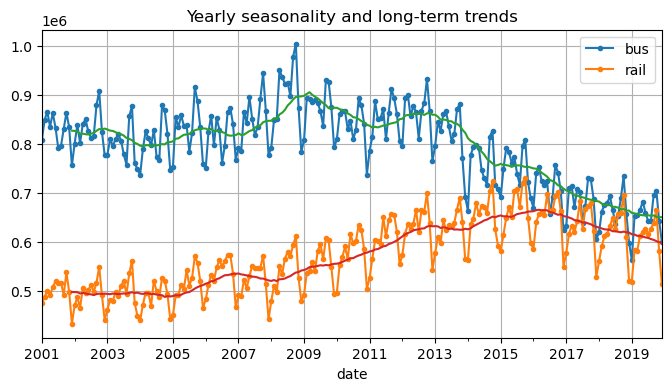

In [32]:
period = slice("2001", "2019")
df_monthly = df.resample("M").mean() # compute the mean of each month
rolling_avg_12_months = df_monthly[period].rolling(window=12).mean()

fig,ax = plt.subplots(figsize=(8,4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_avg_12_months.plot(ax=ax, grid=True, legend=False)

plt.title("Yearly seasonality and long-term trends")
plt.show()

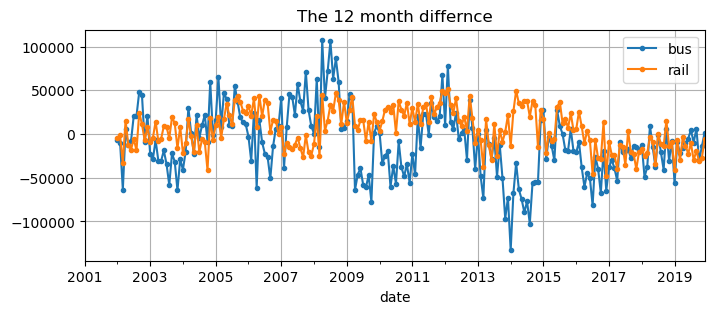

In [35]:
df_monthly.diff(12)[period].plot(grid=True, marker=".", figsize=(8,3))
plt.title("The 12 month differnce")
plt.show()